<a href="https://colab.research.google.com/github/krishnakanth22/MachineLearningWorks/blob/main/heavyrainfall_prediction_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cloud Feature Extraction**

In [ ]:
import cv2
import numpy as np
import os


data_dir = "/content/synthetic_data"
clear_sky_dir = os.path.join(data_dir, "/content/clear sky")
cloudy_dir = os.path.join(data_dir, "/content/cloudy")


os.makedirs(clear_sky_dir, exist_ok=True)
os.makedirs(cloudy_dir, exist_ok=True)

for i in range(9):
    image = np.zeros((100, 100, 3), dtype=np.uint8)  # Black background
    cv2.imwrite(os.path.join(clear_sky_dir, f"clear_sky_{i}.jpg"), image)
for i in range(9):
    image = np.ones((100, 100, 3), dtype=np.uint8) * 255  # White background
    num_clouds = np.random.randint(5, 20)  # Number of cloud-like patterns
    for _ in range(num_clouds):
        x, y = np.random.randint(0, 100, 2)
        radius = np.random.randint(5, 20)
        color = np.random.randint(200, 256)
        cv2.circle(image, (x, y), radius, (color, color, color), -1)
    cv2.imwrite(os.path.join(cloudy_dir, f"cloudy_{i}.jpg"), image)

labels = []
labels.extend([0] * 9)
labels.extend([1] * 9)

import csv

with open(os.path.join(data_dir, "/content/labels.csv"), mode='w', newline='') as label_file:
    label_writer = csv.writer(label_file)
    for label in labels:
        label_writer.writerow([label])
from sklearn.model_selection import train_test_split

image_files = [os.path.join(clear_sky_dir, file) for file in os.listdir(clear_sky_dir)] + \
              [os.path.join(cloudy_dir, file) for file in os.listdir(cloudy_dir)]
features = image_files

with open(os.path.join(data_dir, "/content/labels.csv"), mode='r') as label_file:
    label_reader = csv.reader(label_file)
    labels = [int(row[0]) for row in label_reader]


Nowcasting With VGG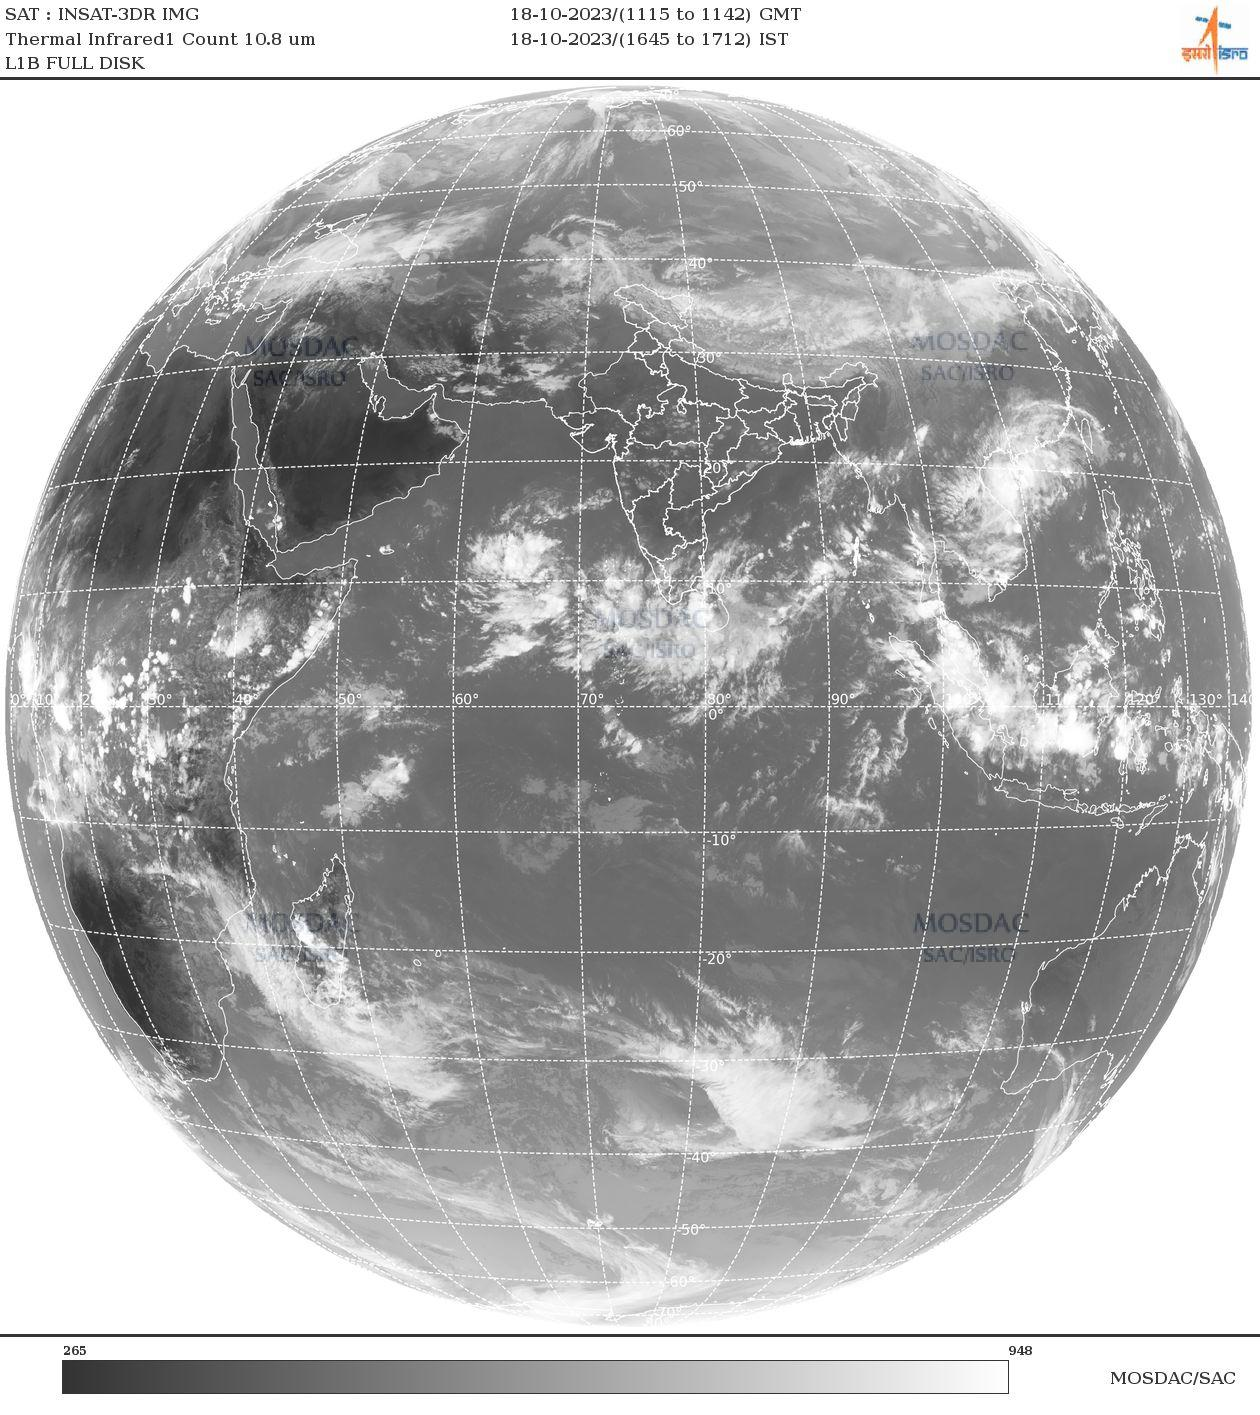

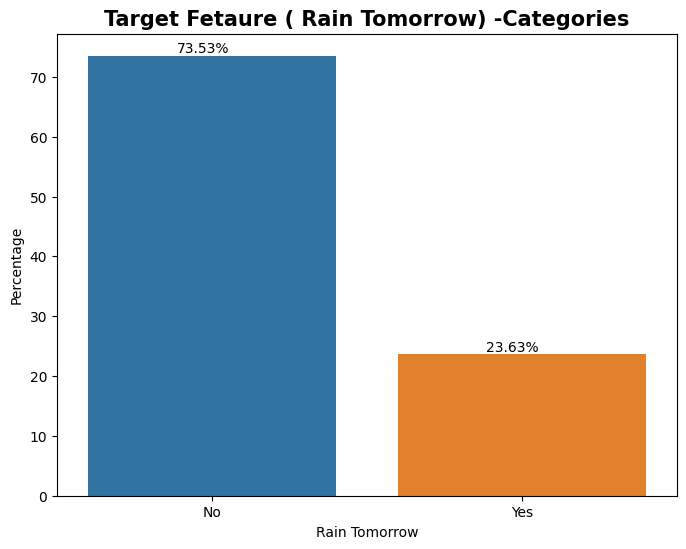

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("/datalab/weatherAUS.csv")
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')



for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')